In [1]:
import sys
sys.path.append('./code')
from importlib import reload

In [2]:
row_colors = ['lightgreen', 'green', 'orange']

columns_to_names = {
    0 : 'Active 1',
    4 : 'Active 2',
    18 : 'Repressive',
}

row_colors_dict = {
'Active 1' : 'lightgreen',
'Active 2' : 'green',
'Repressive' : 'orange',
}

In [5]:
import make_figure4
reload(make_figure4)
from make_figure4 import *
import pickle

goodinds = pickle.load(open('./for_snipping/goodinds', 'rb'))
merged_clustdict = pickle.load(open('./for_snipping/merged_clustdict', 'rb'))
merged_inds_to_subset = pickle.load(open('./for_snipping/merged_inds_to_subset', 'rb'))


cooldict_50kb = pickle.load(open('./for_snipping/cooldict_50kb', 'rb'))
ind_to_gene = pickle.load(open('./for_snipping/ind_to_gene', 'rb'))
all_ind_to_region = pickle.load(open('./for_snipping/all_ind_to_region', 'rb'))

my_treg_comp = pickle.load(open('./for_snipping/my_treg_comp', 'rb'))



In [6]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from initialize import *

treg_250kb = cooler.Cooler('./Treg_all.mcool::/resolutions/250000')
treg_50kb = cooler.Cooler('./Treg_all.mcool::/resolutions/50000')

(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(treg_250kb)


In [9]:
inter_and_intra_connections_treg = pickle.load(open('./for_snipping/inter_and_intra_connections_treg', 'rb'))
inter_and_intra_connections_tcon = pickle.load(open('./for_snipping/inter_and_intra_connections_tcon', 'rb'))

In [25]:
indsoi = list(set([156, 4379, 5065, 9078, 278, 5559, 7060, 7050, 7467, 2690, 5367, 6540, 8205, 5547, 4380, 9077, 5529, 4443, 6324, 3207,
          6415, 8368, 2874, 4383, 6325, 8373, 5065, 5338, 6292, 6317, 6400, 5366, 4893, 6392, 3071, 1411, 3170, 891, 4384, 5082, 
          5064, 6540, 5304, 5529, 4379, 1923, 4380, 7050, 6324, 5367, 243, 242
         ]))

In [26]:
%autoreload 2
from hub_pileup import pileup_bin_pairs

padding_size = 50

our_treg_25kb = cooler.Cooler('./Treg_all.mcool::/resolutions/25000')
our_tcon_25kb = cooler.Cooler('./Tconv_all.mcool::/resolutions/25000')

megaloop_pileup_cooldict = {
    'Our_Treg' : our_treg_25kb,
    'Our_Tcon' : our_tcon_25kb,
}

df1 = pd.DataFrame()
df1['ind'] = indsoi
df1['chrom'] = [all_ind_to_region[x][0] for x in df1['ind']]
df1['cluster'] = -1

df2 = pd.DataFrame()
df2['ind'] = goodinds
df2['chrom'] = [all_ind_to_region[x][0] for x in goodinds]
df2['cluster'] = merged_clustdict['all']
df2 = df2[df2['cluster'].isin([0, 4, 18])]


differential_mat_dict, differential_metadata = pileup_bin_pairs(df1, df2, megaloop_pileup_cooldict,
                                                                chrom_to_start, inter_and_intra_connections_treg, 
                                                                inter_and_intra_connections_tcon, resolution_in=250_000, resolution_out = 25_000, 
                                                                intra=False, inter=True, padding_size=padding_size, fetch_oe=True
                                                               )

Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 7
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 1
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 13
Done with 13
Done with 13
Done with 13
Done with 13
Done with 13
Done with 

/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:386: RuntimeWarning: Mean of empty slice
  mat = np.nanmean(mats, axis=0)
/Genomics/pritykinlab/gabe/jupys/tregs/./code/plotting_functions.py:1116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=fgsz, dpi=dpi)


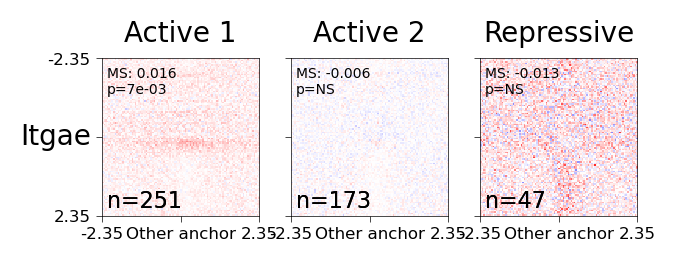

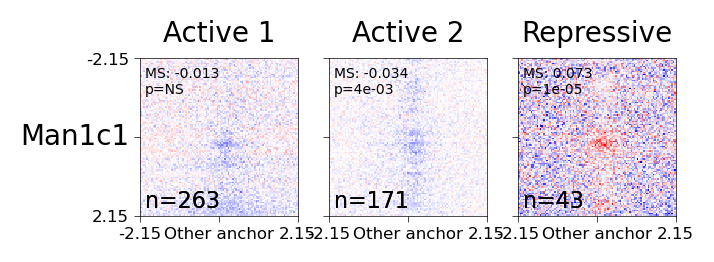

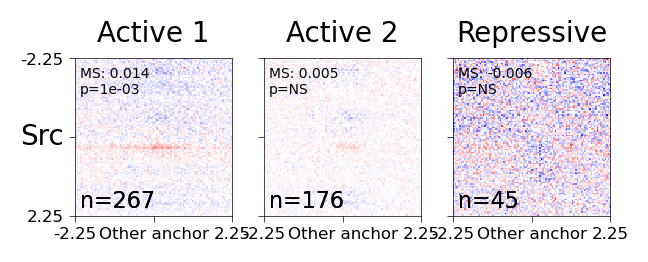

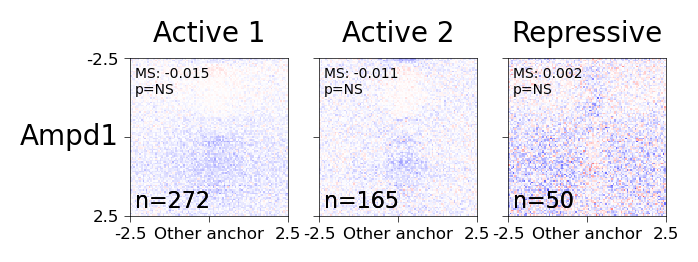

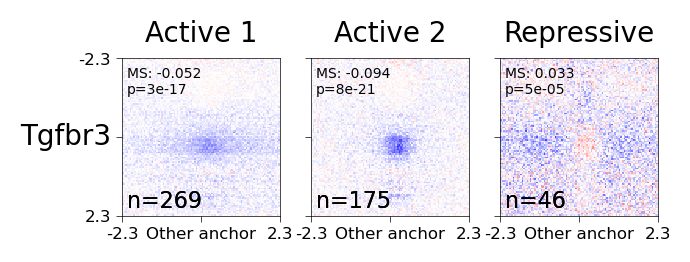

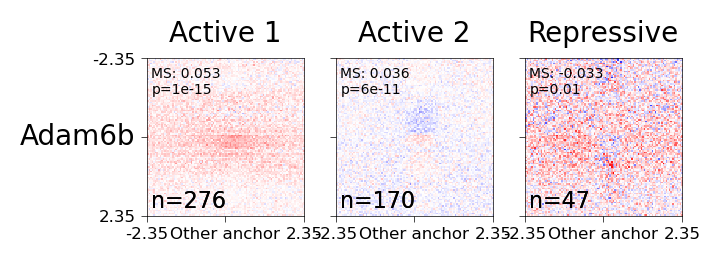

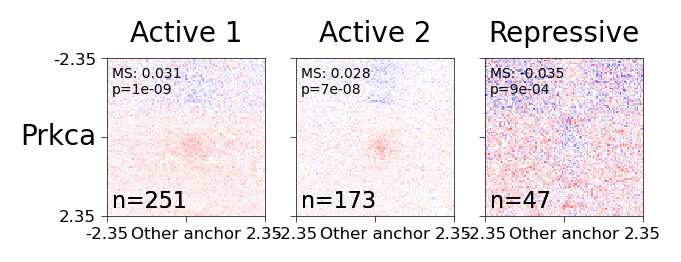

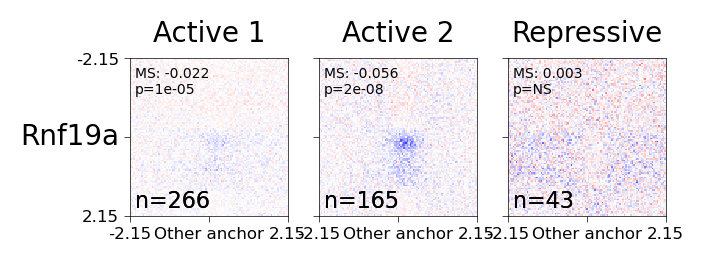

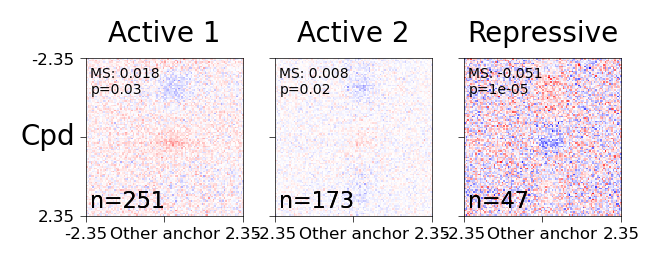

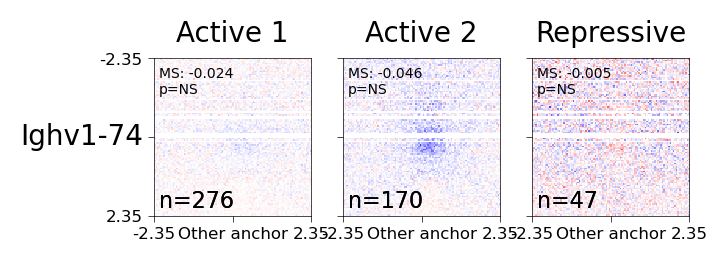

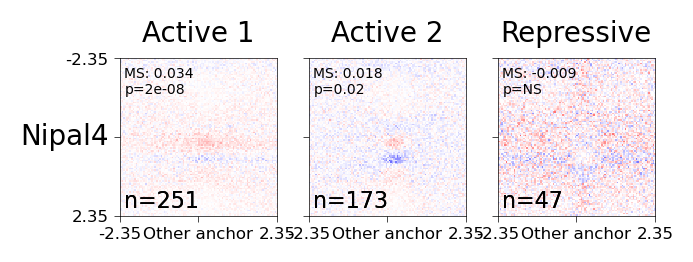

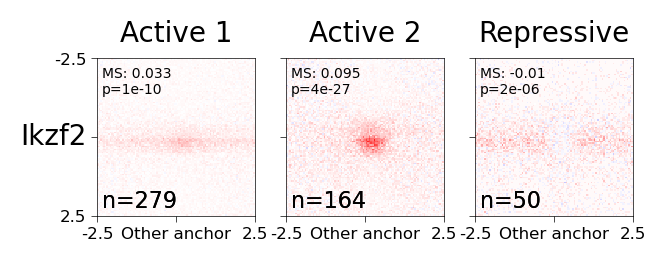

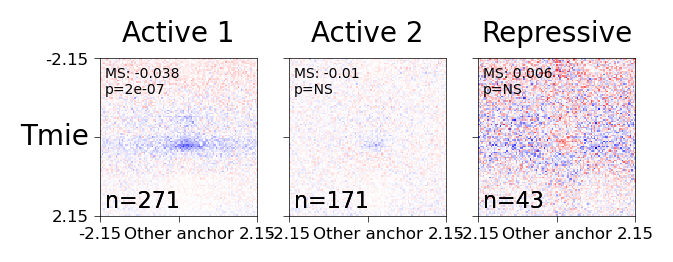

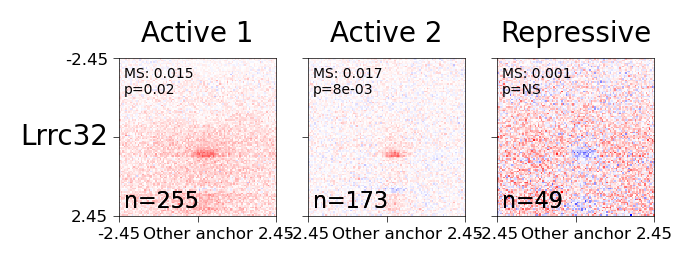

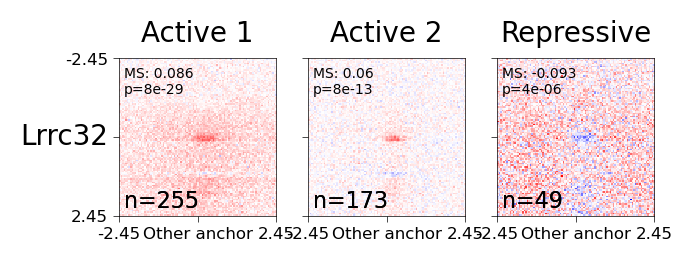

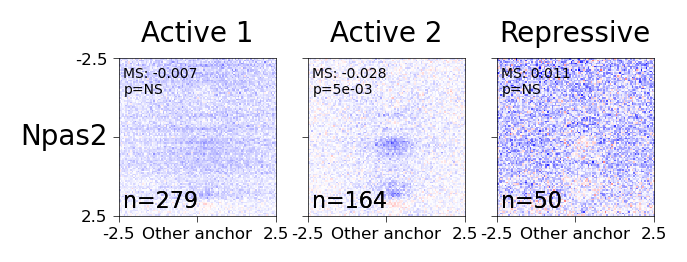

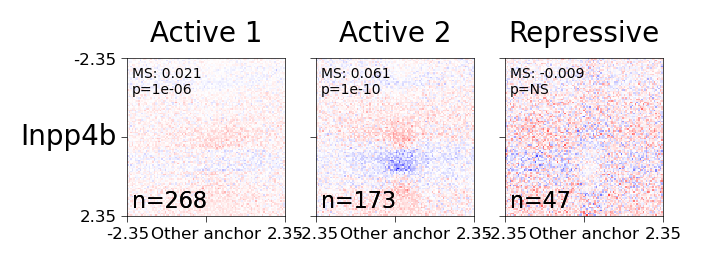

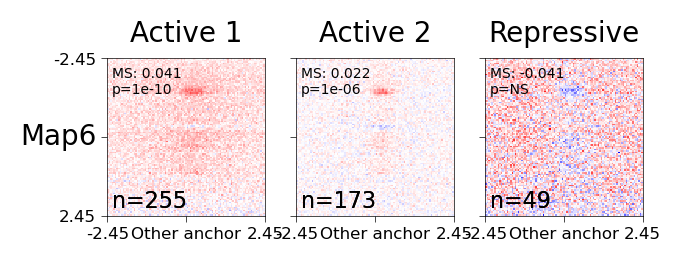

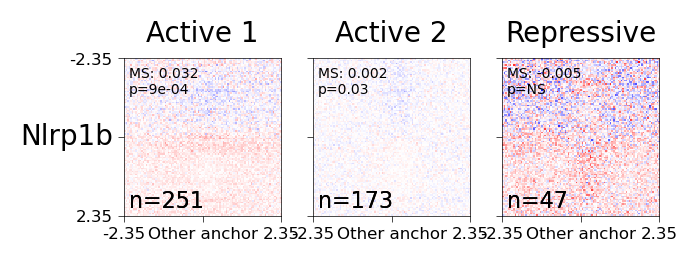

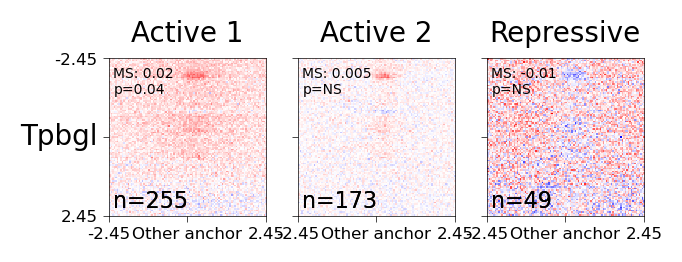

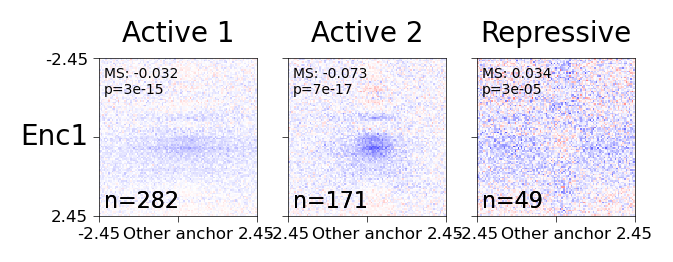

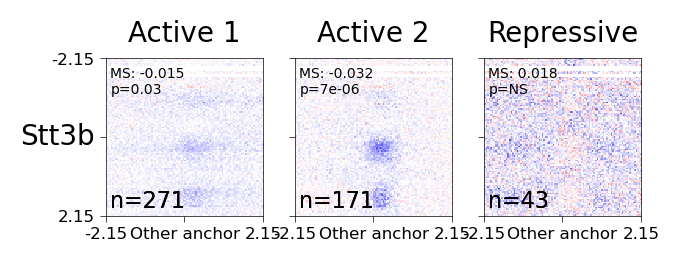

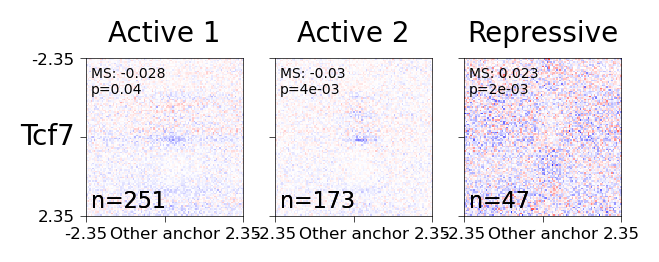

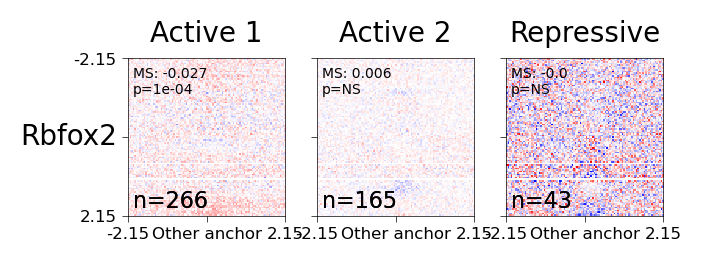

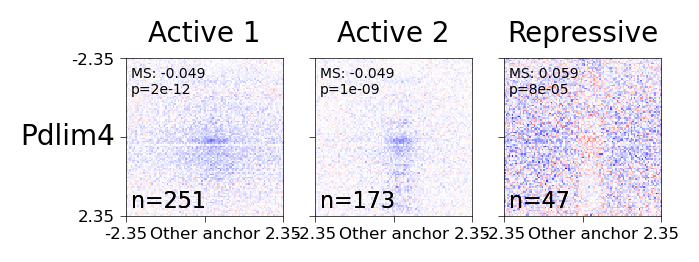

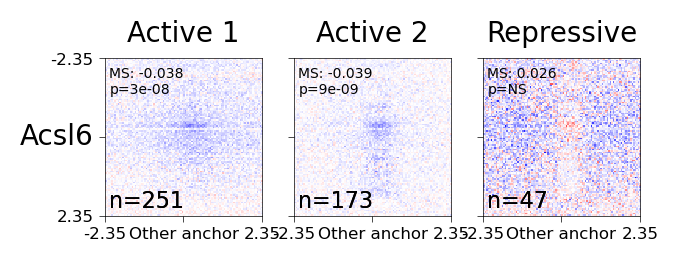

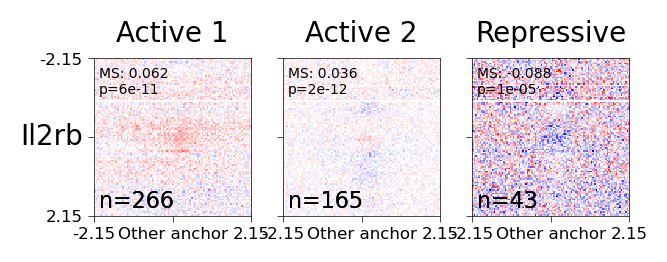

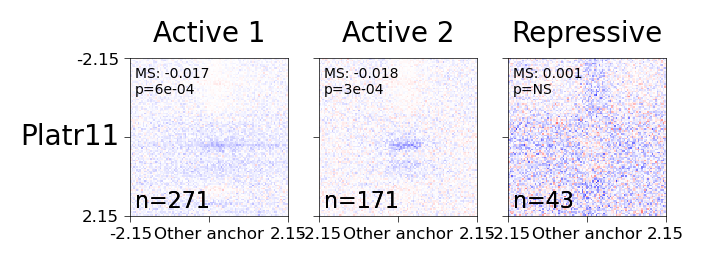

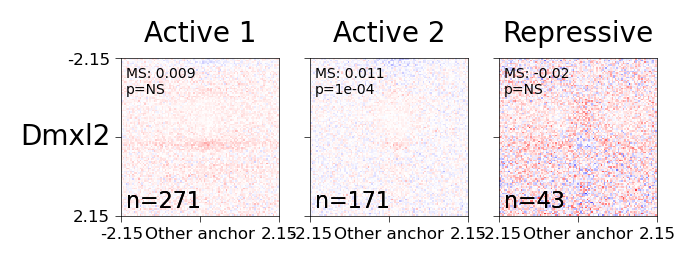

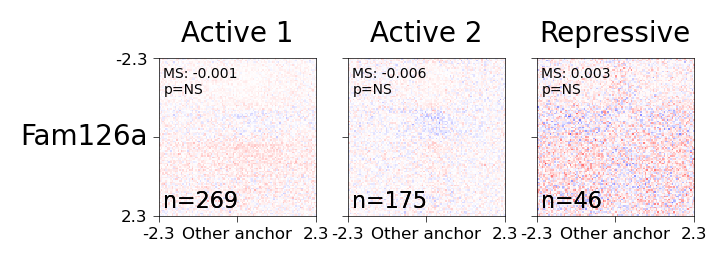

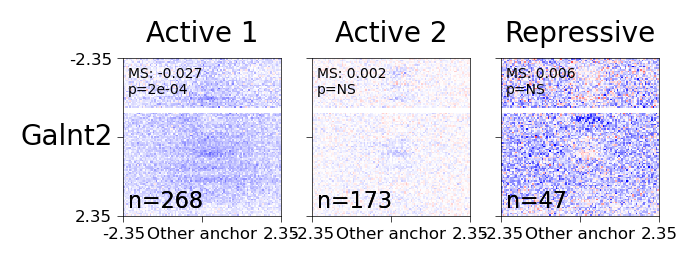

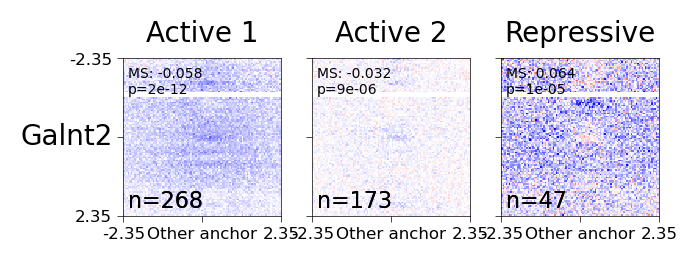

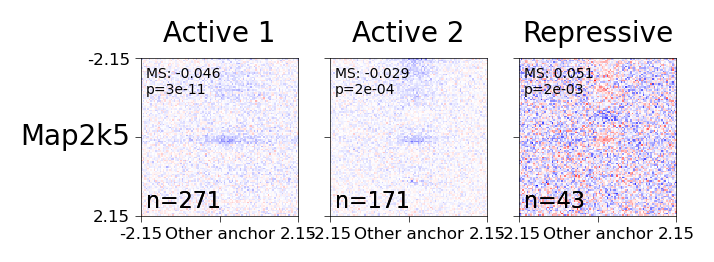

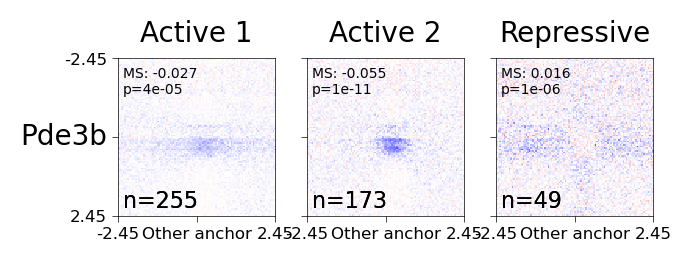

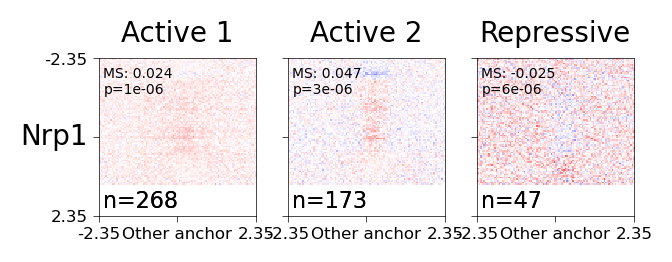

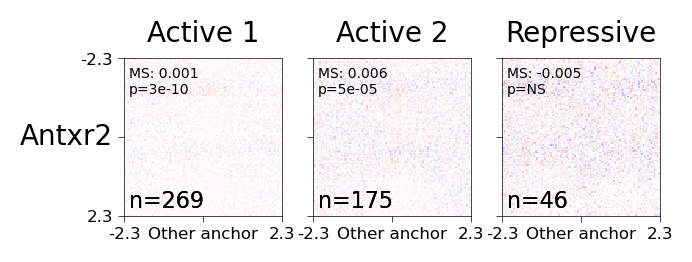

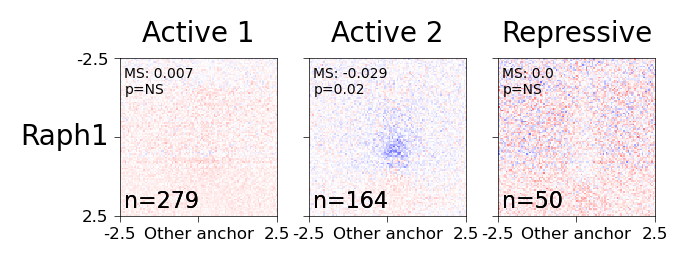

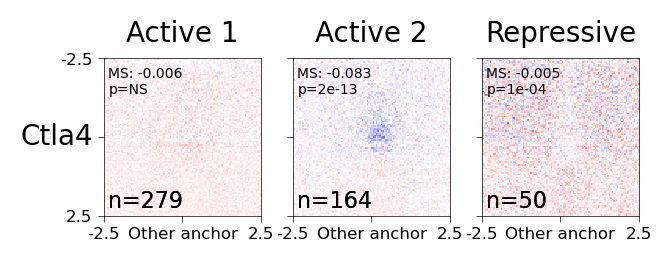

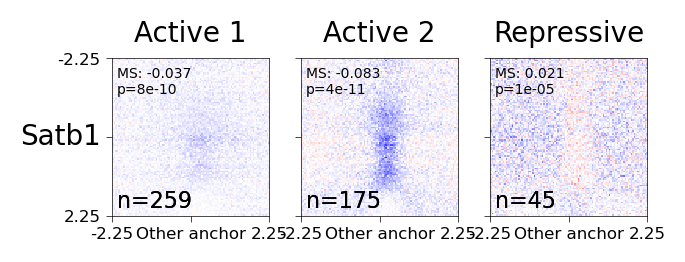

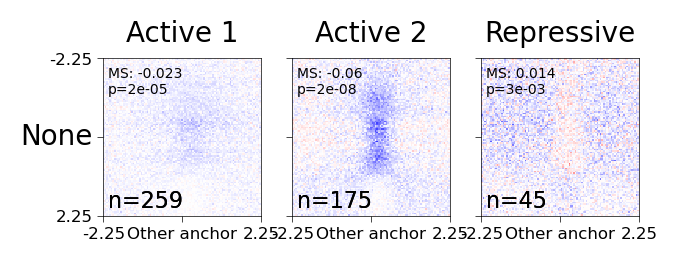

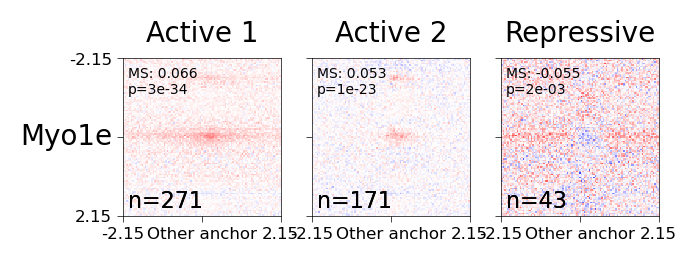

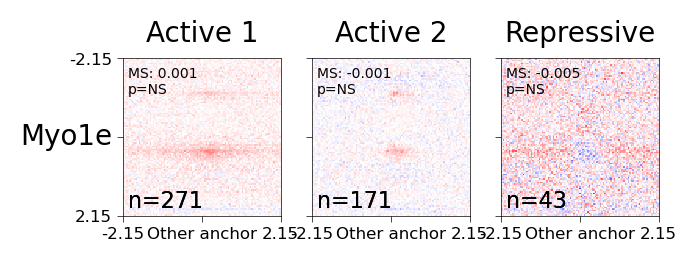

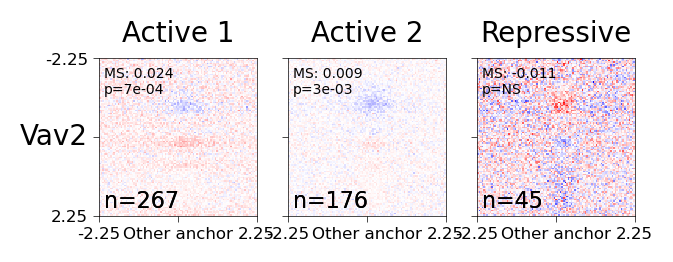

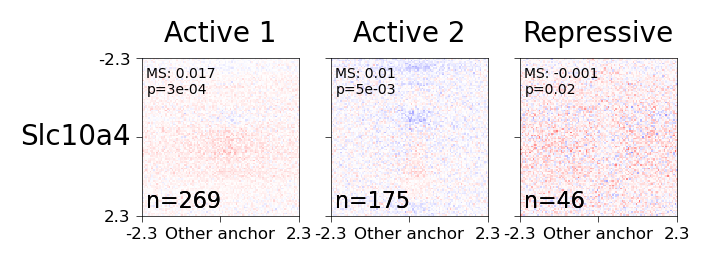

In [27]:
from hub_pileup import plot_pileup_mat

for ind in indsoi:
    ms = []
    if (differential_metadata['ind1']==ind).sum()==0:
        continue

    name = get_name(ind, ind_to_gene)
    fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100)
    for c, cluster in enumerate([0, 4, 18]):
        plt.sca(axs[c])
        idx = ( ((differential_metadata['ind1']==ind) & (differential_metadata['cluster2']==cluster)) | 
                ((differential_metadata['ind2']==ind) & (differential_metadata['cluster1']==cluster))
              )
        rows = []
    
        # mats = (differential_mat_dict['Our_Treg'][idx] - differential_mat_dict['Our_Tcon'][idx])[:, 30:-26, 30:-26]
        mats = (differential_mat_dict['Our_Treg'][idx] - differential_mat_dict['Our_Tcon'][idx])[:, :, :]
        plot_pileup_mat(mats,  plt.gca(), cmap = 'bwr', vmin=-.3, vmax=.3)
    
        plt.title(columns_to_names[cluster])
        plt.grid(False)
        plt.text(.03, .05, f'n={idx.sum()}', transform=plt.gca().transAxes, fontsize=8)
        
        
    n = len(mats)
    cutoff = n*50_000/1e6
    mb = mats.shape[1]*50e3 // 2 / 1e6
    x1, x2 = all_ind_to_region[ind][1], all_ind_to_region[ind][2]
    xs = np.arange(x1 - 50_000*20, x2 + 50_000*20, 50_000)
    
    for c, a in enumerate(axs):
        plt.sca(axs[c])
    
        plt.yticks([-mb, 0, mb])
        plt.gca().set_yticklabels([-cutoff, f'{name}', cutoff])
        plt.gca().get_yticklabels()[1].set_fontsize(10)
        plt.gca().get_yticklabels()[1].set_rotation(0)
        plt.gca().get_yticklabels()[1].set_va('center')
    
        plt.gca().set_xticks([-mb, 0, mb])
        plt.gca().set_xticklabels([-cutoff, "Other anchor", cutoff])
    
        a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
        if c % n != 0 :
            plt.gca().tick_params(labelleft=False)

In [28]:
for ind in indsoi:
    name = get_name(ind, ind_to_gene)
    if name == 'Tmie':
        print(ind)
    if name == 'Itgae':
        print(ind)

6400
5529


In [1]:
print(1)

1


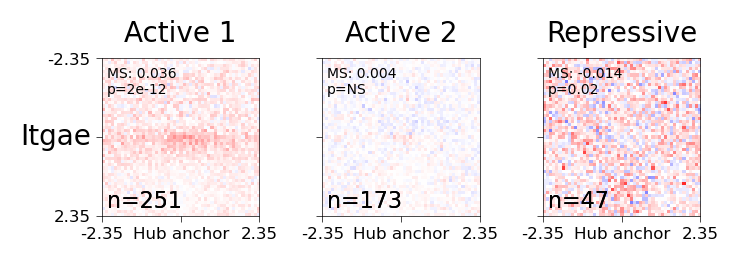

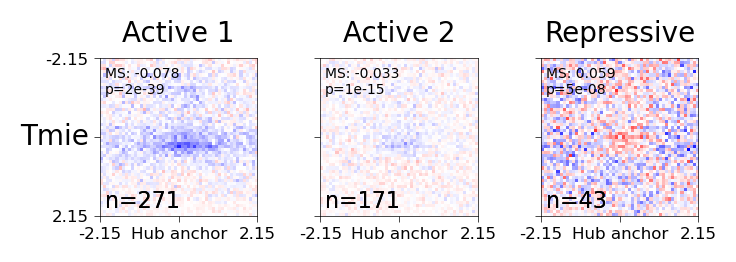

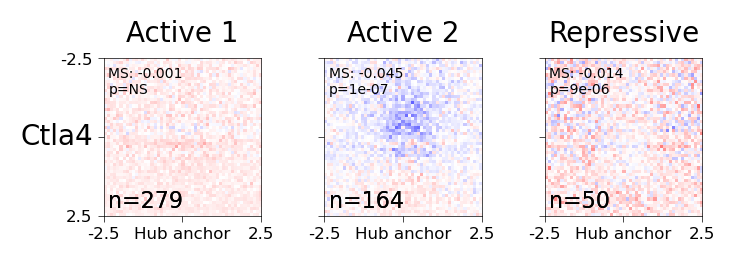

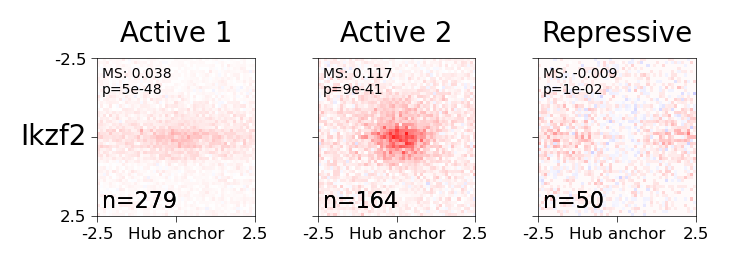

In [113]:
from collections import defaultdict
results_dict = defaultdict(dict)
for ind in [6400, 5529, 243, 278]:
    ms = []
    if (differential_metadata['ind1']==ind).sum()==0:
        continue

    name = get_name(ind, ind_to_gene)
    fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100, xspace=1.4)
    for c, cluster in enumerate([0, 4, 18]):
        plt.sca(axs[c])
        idx = ( ((differential_metadata['ind1']==ind) & (differential_metadata['cluster2']==cluster)) | 
                ((differential_metadata['ind2']==ind) & (differential_metadata['cluster1']==cluster))
              )
        rows = []
    
        mats = (differential_mat_dict['Our_Treg'][idx] - differential_mat_dict['Our_Tcon'][idx])[:, 28:-22, 28:-22]
        results = plot_pileup_mat(mats,  plt.gca(), cmap = 'bwr', vmin=-.3, vmax=.3, center=4,
                                              method='center_square',
                                             show_filts=True
                                 )
        results_dict[ind][cluster] = results
    
        plt.title(columns_to_names[cluster])
        plt.grid(False)
        plt.text(.03, .05, f'n={idx.sum()}', transform=plt.gca().transAxes, fontsize=8)
        
        
    n = len(mats)
    cutoff = n*50_000/1e6
    mb = mats.shape[1]*50e3 // 2 / 1e6
    x1, x2 = all_ind_to_region[ind][1], all_ind_to_region[ind][2]
    xs = np.arange(x1 - 50_000*20, x2 + 50_000*20, 50_000)
    
    for c, a in enumerate(axs):
        plt.sca(axs[c])
    
        plt.yticks([-mb, 0, mb])
        plt.gca().set_yticklabels([-cutoff, f'{name}', cutoff])
        plt.gca().get_yticklabels()[1].set_fontsize(10)
        plt.gca().get_yticklabels()[1].set_rotation(0)
        plt.gca().get_yticklabels()[1].set_va('center')
    
        plt.gca().set_xticks([-mb, 0, mb])
        plt.gca().set_xticklabels([-cutoff, "Hub anchor", cutoff])
    
        a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
        if c % n != 0 :
            plt.gca().tick_params(labelleft=False)
    fig.savefig(f'./plots/differential_megaloop_pileup/{name}.pdf', bbox_inches='tight')

In [141]:
20*mm/3, 40*mm/3

(0.26246719160104987, 0.5249343832020997)

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python

-0.125 0.125
0.875 1.125


/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python

-0.125 0.125
0.875 1.125


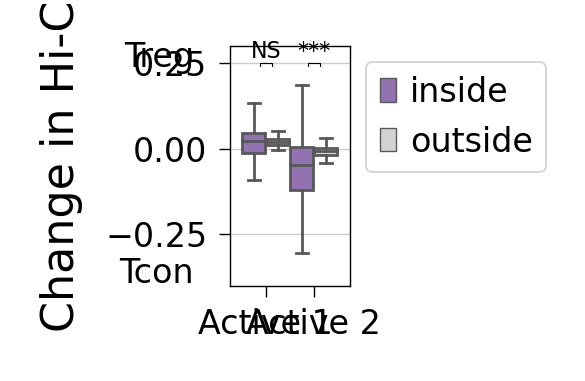

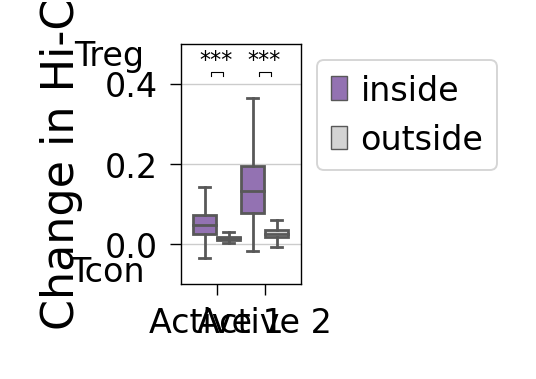

In [144]:
import itertools
ylims = [[-.4, .3], [-.1, .5]]
ymaxes = [.22, .4]
for c, ind in enumerate([243, 278]):
    rows = []

    for cluster in [0, 4]:
        data_inside = results_dict[ind][cluster][2]['v_middle']
        data_outside = results_dict[ind][cluster][2]['v_outside']
        data_in =  zip(*[['inside']*len(data_inside), data_inside, [columns_to_names[cluster]]*len(data_inside)])
        data_out = zip(*[['outside']*len(data_outside), data_outside, [columns_to_names[cluster]]*len(data_outside)])
        rows.extend(data_in)
        rows.extend(data_out)
    data = pd.DataFrame(rows, columns = ['loc', 'values', 'hub'])
    
    fig, axs = init_subplots_exact(1, 1, fgsz=(.3, .6), dpi = 200)
    sns.boxplot(data, x='hub', y='values', hue='loc', palette=['tab:purple', 'lightgray'], showfliers=False,
               width = 1)
    plt.gca().set_axisbelow(True)
    plt.legend(bbox_to_anchor=(1, 1), title_fontsize=6)
    plt.title('')
    plt.ylabel("Change in Hi-C")
    add_yaxis_labels('Tcon', 'Treg', plt.gca(), fontsize=6, x = -.3)
    plt.xlabel("")
    
    order = ['Active 1', 'Active 2']
    hue_order = ['inside', 'outside']
    pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in itertools.combinations(hue_order, 2)]
    plt.ylim(ylims[c])
    add_stat_annotation(plt.gca(), data, 'hub', 'values', 'loc', order, hue_order, pairs,
                       ymax=ymaxes[c], delta=.16)
    fig.savefig(f'./plots/differential_megaloop_pileup/boxplot_{ind}.pdf', bbox_inches='tight')

In [125]:
from aux_functions import format_pval_as_asterisks

def add_stat_annotation(ax, data, xcol, ycol, hue, order, hue_order, box_pairs, ymax=.32, delta = .15):
    """ Add statistical annotations for comparing hue within each x."""
    unique_x = data[xcol].unique()
    hue_levels = data[hue].unique()
    
    # Prepare a mapping from hue and x to x-tick positions
    hue_offsets = {hue: (i-1)*.25 for i, hue in enumerate(hue_order)}
    x_positions = {v: k for k, v in enumerate(order)}

    seen = set()
    for pair in box_pairs:
        if pair[0][0] not in seen:
            seen.add(pair[0][0])
            yoff = 0 
        else:
            yoff += delta
        # Filter data for each pair

        data1 = data[(data[xcol] == pair[0][0]) & (data[hue] == pair[0][1])]
        data2 = data[(data[xcol] == pair[1][0]) & (data[hue] == pair[1][1])]

        # Perform rank sum test
        stat, p_value = scipy.stats.ranksums(data1[ycol], data2[ycol])
    
        # Find positions for annotations
        x1 = x_positions[pair[0][0]] + hue_offsets[pair[0][1]] + .25/2
        x2 = x_positions[pair[1][0]] + hue_offsets[pair[1][1]] + .25/2
        print(x1, x2)
        y, h, col = ymax + 0.02, 0.01, 'k'

        y = y * (1 + yoff)
        # Draw the lines and annotations
        ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=.2, c=col)
        ax.text((x1 + x2) * .5, y + h, f'{format_pval_as_asterisks(p_value)}', ha='center', va='bottom', color=col,
               fontsize=4)

-0.125 0.125
0.875 1.125


/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python

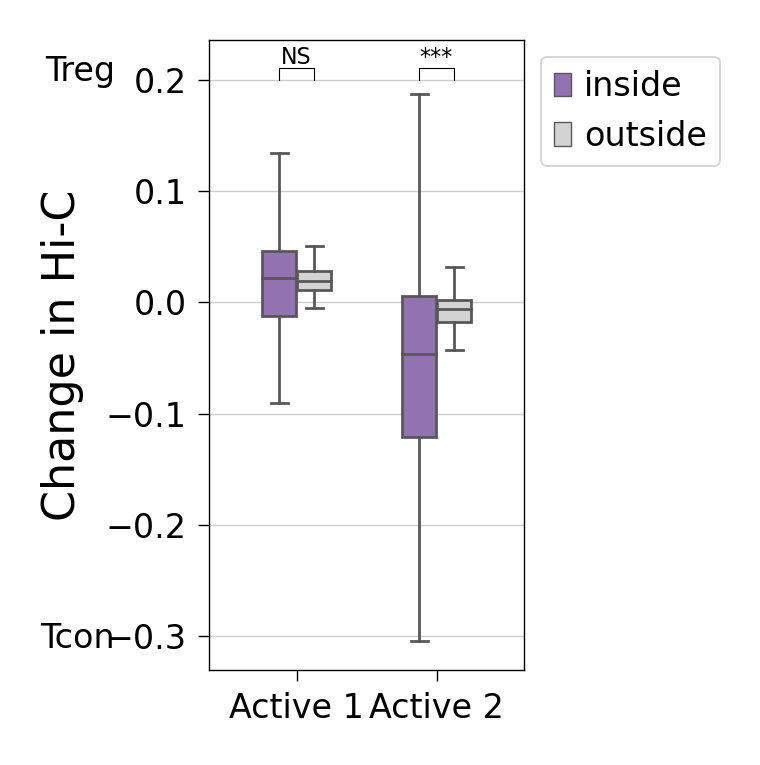